# Team 4 - Ted Talks

![](https://psmarketingimages.s3.amazonaws.com/blog/wp-content/uploads/2017/04/23103819/TED-Talks-for-Small-Business-and-Entrepreneurs.jpg)

## Overview about dataset
These datasets contain information about all audio-video recordings of TED Talks uploaded to the official TED.com website until September 21st, 2017. The TED main dataset contains information about all talks including number of views, number of comments, descriptions, speakers and titles. The TED transcripts dataset contains the transcripts for all talks available on TED.com.

Description of columns:
* comments: The number of first level comments made on the talk
* description: A blurb of what the talk is about
* duration: The duration of the talk in seconds
* event: The TED/TEDx event where the talk took place
* film_date: The Unix timestamp of the filming
* languages: The number of languages in which the talk is available
* main_speaker: The first named speaker of the talk
* name: The official name of the TED Talk. Includes the title and the speaker.
* num_speaker: The number of speakers in the talk
* published_date: The Unix timestamp for the publication of the talk on TED.com
* ratings: A stringified dictionary of the various ratings given to the talk (inspiring, fascinating, jaw dropping, etc.)
related_talks: A list of dictionaries of recommended talks to watch next
* speaker_occupation: The occupation of the main speaker
* tags: The themes associated with the talk
* title: The title of the talk
* url: The URL of the talk
* views: The number of views on the talk

## Cleaning Process

### Load libraries and have a look at dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime

In [2]:
# Read the dataset
data = pd.read_csv('ted_main.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2550 entries, 0 to 2549
Data columns (total 17 columns):
comments              2550 non-null int64
description           2550 non-null object
duration              2550 non-null int64
event                 2550 non-null object
film_date             2550 non-null int64
languages             2550 non-null int64
main_speaker          2550 non-null object
name                  2550 non-null object
num_speaker           2550 non-null int64
published_date        2550 non-null int64
ratings               2550 non-null object
related_talks         2550 non-null object
speaker_occupation    2544 non-null object
tags                  2550 non-null object
title                 2550 non-null object
url                   2550 non-null object
views                 2550 non-null int64
dtypes: int64(7), object(10)
memory usage: 338.8+ KB


In [4]:
data.head()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,1140912000,35,Majora Carter,Majora Carter: Greening the ghetto,1,1151367060,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550
4,593,You've never seen data presented like this. Wi...,1190,TED2006,1140566400,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,1151440680,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869


In [5]:
data['speaker_occupation'] = data['speaker_occupation'].fillna('not recorded')

Add **duration in minutes and id** columns for data

In [6]:
data['talk_id'] = np.arange(1,2551)

In [7]:
data['duration_minutes'] = data['duration'] / 60

In [8]:
print(data.shape)
display(data.head())

(2550, 19)


,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views,talk_id,duration_minutes
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110,1,19.400000
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520,2,16.283333
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292,3,21.433333
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,1140912000,35,Majora Carter,Majora Carter: Greening the ghetto,1,1151367060,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550,4,18.600000
4,593,You've never seen data presented like this. Wi...,1190,TED2006,1140566400,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,1151440680,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869,5,19.833333


* 2 **problems** in dataset
  * Encoding time as a number
  * List of information in string format 

In [9]:
data[['film_date','published_date','ratings','related_talks','tags']].head()

,film_date,published_date,ratings,related_talks,tags
0,1140825600,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...","['children', 'creativity', 'culture', 'dance',..."
1,1140825600,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...","['alternative energy', 'cars', 'climate change..."
2,1140739200,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...","['computers', 'entertainment', 'interface desi..."
3,1140912000,1151367060,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...","['MacArthur grant', 'activism', 'business', 'c..."
4,1140566400,1151440680,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...","['Africa', 'Asia', 'Google', 'demo', 'economic..."


### Encode the Unix timestamp in film_date and published_dat

In [10]:
data['film_date'] = data['film_date'].apply(lambda x: datetime.utcfromtimestamp(x))
data['published_date'] = data['published_date'].apply(lambda x: datetime.utcfromtimestamp(x))

In [11]:
data[['film_date','published_date']].head()

,film_date,published_date
0,2006-02-25,2006-06-27 00:11:00
1,2006-02-25,2006-06-27 00:11:00
2,2006-02-24,2006-06-27 00:11:00
3,2006-02-26,2006-06-27 00:11:00
4,2006-02-22,2006-06-27 20:38:00


In [12]:
data['film_date'] = data['film_date'].dt.strftime('%Y-%m-%d')
data['published_date'] = data['published_date'].dt.strftime('%Y-%m-%d')

In [13]:
data[['film_date','published_date']].head()

,film_date,published_date
0,2006-02-25,2006-06-27
1,2006-02-25,2006-06-27
2,2006-02-24,2006-06-27
3,2006-02-26,2006-06-27
4,2006-02-22,2006-06-27


In [14]:
data['year'] = data['published_date'].str[:4]

### Seperate 3 tables

#### Ratings Table

#### Get list of key words

In [15]:
data['ratings'][0]

"[{'id': 7, 'name': 'Funny', 'count': 19645}, {'id': 1, 'name': 'Beautiful', 'count': 4573}, {'id': 9, 'name': 'Ingenious', 'count': 6073}, {'id': 3, 'name': 'Courageous', 'count': 3253}, {'id': 11, 'name': 'Longwinded', 'count': 387}, {'id': 2, 'name': 'Confusing', 'count': 242}, {'id': 8, 'name': 'Informative', 'count': 7346}, {'id': 22, 'name': 'Fascinating', 'count': 10581}, {'id': 21, 'name': 'Unconvincing', 'count': 300}, {'id': 24, 'name': 'Persuasive', 'count': 10704}, {'id': 23, 'name': 'Jaw-dropping', 'count': 4439}, {'id': 25, 'name': 'OK', 'count': 1174}, {'id': 26, 'name': 'Obnoxious', 'count': 209}, {'id': 10, 'name': 'Inspiring', 'count': 24924}]"

As you see , *ratings* column is a list of dictionary putted in a string . 
**Our taks is try to get value of key word "name"**

In [16]:
rating_kw = set()
for i in range(50): # range can change to check whether words are same in every rows
    ratings = eval(data['ratings'][i]) # use eval function to get list
    for rating in ratings: # access to list element (dicts)
        rating_kw.add(rating['name']) # use ADD method of set data type to add value of keyword 'name'
print(rating_kw)

{'Obnoxious', 'Ingenious', 'Confusing', 'OK', 'Persuasive', 'Courageous', 'Funny', 'Jaw-dropping', 'Longwinded', 'Inspiring', 'Beautiful', 'Informative', 'Unconvincing', 'Fascinating'}


Next , we create new DataFrame which columns name are key words , rows contain their apperance times . Especially the last column is talk id



In [17]:
columns = list(rating_kw).append('talk_id')

df_ratings = pd.DataFrame(columns = columns) # create a new DataFrame which column name is keyword name and talk id
for i in range(2550):
    ratings = eval(data['ratings'][i]) # try to get above list
    temp = {} # produce an empty dict to prepare for adding to our DataFrame , which has 14 word and 1 talk id as key words
    for rating_dict in ratings:
        temp[rating_dict['name']] = rating_dict['count']
    temp['talk_id'] = i + 1
    df_ratings = df_ratings.append(temp, ignore_index=True) # use APPEND method of DataFrame to add new rows

In [18]:
df_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2550 entries, 0 to 2549
Data columns (total 15 columns):
Beautiful       2550 non-null float64
Confusing       2550 non-null float64
Courageous      2550 non-null float64
Fascinating     2550 non-null float64
Funny           2550 non-null float64
Informative     2550 non-null float64
Ingenious       2550 non-null float64
Inspiring       2550 non-null float64
Jaw-dropping    2550 non-null float64
Longwinded      2550 non-null float64
OK              2550 non-null float64
Obnoxious       2550 non-null float64
Persuasive      2550 non-null float64
Unconvincing    2550 non-null float64
talk_id         2550 non-null float64
dtypes: float64(15)
memory usage: 298.9 KB


*Let's see what we have struggled !*

In [19]:
df_ratings.head()

,Beautiful,Confusing,Courageous,Fascinating,Funny,Informative,Ingenious,Inspiring,Jaw-dropping,Longwinded,OK,Obnoxious,Persuasive,Unconvincing,talk_id
0,4573.0,242.0,3253.0,10581.0,19645.0,7346.0,6073.0,24924.0,4439.0,387.0,1174.0,209.0,10704.0,300.0,1.0
1,58.0,62.0,139.0,132.0,544.0,443.0,56.0,413.0,116.0,113.0,203.0,131.0,268.0,258.0,2.0
2,60.0,27.0,45.0,166.0,964.0,395.0,183.0,230.0,54.0,78.0,146.0,142.0,230.0,104.0,3.0
3,291.0,32.0,760.0,132.0,59.0,380.0,105.0,1070.0,230.0,53.0,85.0,35.0,460.0,36.0,4.0
4,942.0,72.0,318.0,4606.0,1390.0,5433.0,3202.0,2893.0,3736.0,110.0,248.0,61.0,2542.0,67.0,5.0


In [20]:
melt_ratings = pd.melt(df_ratings, id_vars='talk_id', var_name='keywords', value_name = 'votes')
melt_ratings.head()

,talk_id,keywords,votes
0,1.0,Beautiful,4573.0
1,2.0,Beautiful,58.0
2,3.0,Beautiful,60.0
3,4.0,Beautiful,291.0
4,5.0,Beautiful,942.0


Save to another csv for analysis

In [21]:
df_ratings.to_csv('ratings.csv')

#### Related talks

*Again, data type of related_talks is list of string. So we need to use eval_function again*

In [22]:
data['related_talks'][0]

'[{\'id\': 865, \'hero\': \'https://pe.tedcdn.com/images/ted/172559_800x600.jpg\', \'speaker\': \'Ken Robinson\', \'title\': \'Bring on the learning revolution!\', \'duration\': 1008, \'slug\': \'sir_ken_robinson_bring_on_the_revolution\', \'viewed_count\': 7266103}, {\'id\': 1738, \'hero\': \'https://pe.tedcdn.com/images/ted/de98b161ad1434910ff4b56c89de71af04b8b873_1600x1200.jpg\', \'speaker\': \'Ken Robinson\', \'title\': "How to escape education\'s death valley", \'duration\': 1151, \'slug\': \'ken_robinson_how_to_escape_education_s_death_valley\', \'viewed_count\': 6657572}, {\'id\': 2276, \'hero\': \'https://pe.tedcdn.com/images/ted/3821f3728e0b755c7b9aea2e69cc093eca41abe1_2880x1620.jpg\', \'speaker\': \'Linda Cliatt-Wayman\', \'title\': \'How to fix a broken school? Lead fearlessly, love hard\', \'duration\': 1027, \'slug\': \'linda_cliatt_wayman_how_to_fix_a_broken_school_lead_fearlessly_love_hard\', \'viewed_count\': 1617101}, {\'id\': 892, \'hero\': \'https://pe.tedcdn.com/ima

*Inside string we have a list of about 6 dictionaries*

In [23]:
eval(data['related_talks'][0])[0] # get rid of square bracket

{'id': 865,
 'hero': 'https://pe.tedcdn.com/images/ted/172559_800x600.jpg',
 'speaker': 'Ken Robinson',
 'title': 'Bring on the learning revolution!',
 'duration': 1008,
 'slug': 'sir_ken_robinson_bring_on_the_revolution',
 'viewed_count': 7266103}

*Goal is that we create a new data frame called related talk.*
*So firstly , we need to get column names*

In [24]:
keys_dict = eval(data['related_talks'][0])[0]
columns = [*keys_dict] #return list of key words
columns

['id', 'hero', 'speaker', 'title', 'duration', 'slug', 'viewed_count']

*hero column is maybe not useful. While talk id column is extremly benificial so we remove hero key word and append talk_id key word into our list*

In [25]:
columns.remove('hero')
columns.append('talk_id')

### Create a dataframe for related talks
related_talk_df = pd.DataFrame(columns= columns)
related_talk_df

,id,speaker,title,duration,slug,viewed_count,talk_id


*Now we walk through line by line in related_talks column. Our goal here is in a loop we build a dictionary to append to above data frame. Remeber that after take eval ,  dictionaries are still left*

In [26]:
for i in range(2550):
    row_list = eval(data['related_talks'][i])
    temp = {}
    for list_ in row_list:
        temp['id'] = list_['id']
        temp['speaker'] = list_['speaker']
        temp['title'] = list_['title']
        temp['duration'] = list_['duration']
        temp['slug']= list_['slug']
        temp['viewed_count']= list_['viewed_count']
        temp['talk_id']= i + 1
        related_talk_df = related_talk_df.append(temp, ignore_index=True)

*Let's have a quick see !*

In [27]:
related_talk_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15010 entries, 0 to 15009
Data columns (total 7 columns):
id              15010 non-null object
speaker         15010 non-null object
title           15010 non-null object
duration        15010 non-null object
slug            15010 non-null object
viewed_count    15010 non-null object
talk_id         15010 non-null object
dtypes: object(7)
memory usage: 820.9+ KB


*As you can see, data type of duration , view_count and talk_id columns is not numerical. So we turn them into int data type*

In [28]:
related_talk_df['duration'] = related_talk_df['duration'].astype('int')
related_talk_df['viewed_count'] = related_talk_df['viewed_count'].astype('int')
related_talk_df['talk_id'] = related_talk_df['talk_id'].astype('int')

*And now we can take a look at our new data frame*

In [29]:
print(related_talk_df.shape)
related_talk_df.head()

(15010, 7)


,id,speaker,title,duration,slug,viewed_count,talk_id
0,865,Ken Robinson,Bring on the learning revolution!,1008,sir_ken_robinson_bring_on_the_revolution,7266103,1
1,1738,Ken Robinson,How to escape education's death valley,1151,ken_robinson_how_to_escape_education_s_death_v...,6657572,1
2,2276,Linda Cliatt-Wayman,"How to fix a broken school? Lead fearlessly, l...",1027,linda_cliatt_wayman_how_to_fix_a_broken_school...,1617101,1
3,892,Charles Leadbeater,Education innovation in the slums,1138,charles_leadbeater_on_education,772296,1
4,1232,Geoff Mulgan,A short intro to the Studio School,376,geoff_mulgan_a_short_intro_to_the_studio_school,667971,1


#### Tags

In [30]:
data['tags'][0]

"['children', 'creativity', 'culture', 'dance', 'education', 'parenting', 'teaching']"

*See tags column may be the simplest. We also need eval_function to remove double quote.However let's release a new frame with 2 columns called talk_id and tags*

In [31]:
tags_df = pd.DataFrame(columns=['talk_id', 'tags'])

*To add into frame, we just go through every line and add every dictionary with keyword is talk id , value is tag*

In [32]:
for i in range(2550):
    list_tags = eval(data['tags'][i])
    for tag in list_tags: 
        tags_df = tags_df.append({'talk_id': i +1, 'tags': tag}, ignore_index = True)

*Now take a look at what we have done !*

In [33]:
print(tags_df.shape)
tags_df.head(10)

(19154, 2)


,talk_id,tags
0,1,children
1,1,creativity
2,1,culture
3,1,dance
4,1,education
5,1,parenting
6,1,teaching
7,2,alternative energy
8,2,cars
9,2,climate change


*Awesome ! Now we have totally 4 tables (1 origin and 3 extra)*

In [34]:
tags_df.to_csv('tags.csv')

# Explore Data Analysis

*Let's see how numerical values correlate with each other*

*But we need to choose int type column first*


In [35]:
TedIntColumns=data.select_dtypes(include=['int64'])

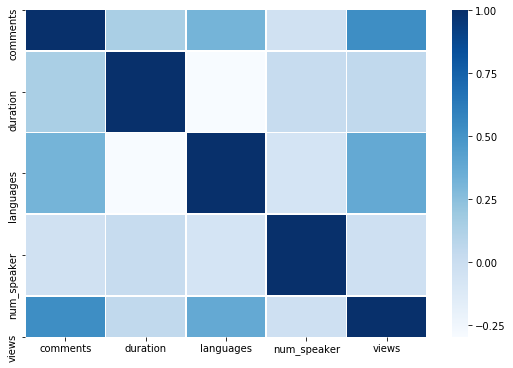

In [36]:
plt.figure(figsize=(9,6))
sns.heatmap(TedIntColumns.corr(),linewidths=.5,cmap="Blues")

*Interesting ! Maybe there is a highly correlation between published_date and film date*

*Let's find the answer for the big question : What makes a talk successful. Is it speaker , duration , language or topic*

*Let's see top 10 speakers who have the most view*

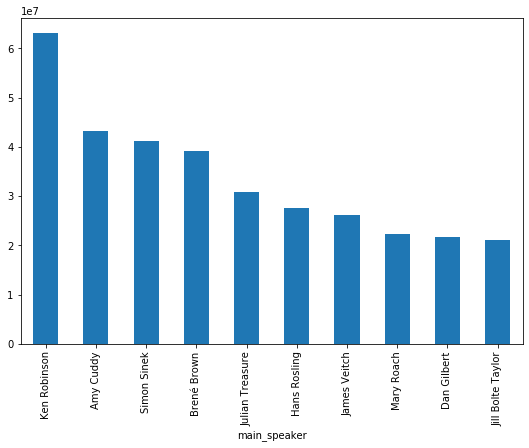

In [37]:
plt.figure(figsize=(9,6))
data.groupby('main_speaker').views.sum().nlargest(10).plot.bar(y='sum view',x='speaker')

*Ken Robinson has the highest view. Maybe he is the success key. So soon to answer. Why don't we investigate more ?*

*Below is total talks he hosted*

Text(0, 0.5, 'title')

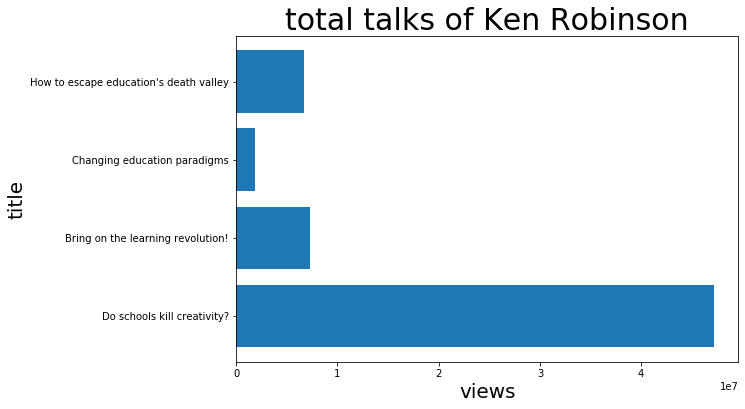

In [38]:
#@title Default title tex
plt.figure(figsize=(9,6))
plt.barh(y='title',width='views',data=data[data['main_speaker']=='Ken Robinson'])
plt.title('total talks of Ken Robinson',fontsize=30)
plt.xlabel('views',fontsize=20)
plt.ylabel('title',fontsize=20)

*He has only 4 talks and just one of them very very hot (47M views).While there are more 2500 talks.Let's check top 10 speaker has the highest view mean*

In [39]:
top_main = data.groupby('main_speaker')['views'].mean().sort_values(ascending=False).head(5)
lyst_speaker = top_main.index.to_list()
views = list(top_main.values)
frame = {'Main speaker':lyst_speaker,'Views':views}
top_main_speaker = pd.DataFrame(frame)
top_main_speaker

,Main speaker,Views
0,Amy Cuddy,43155405.0
1,Mary Roach,22270883.0
2,Jill Bolte Taylor,21190883.0
3,Tony Robbins,20685401.0
4,Simon Sinek,20556685.0


Text(0, 0.5, 'Speaker')

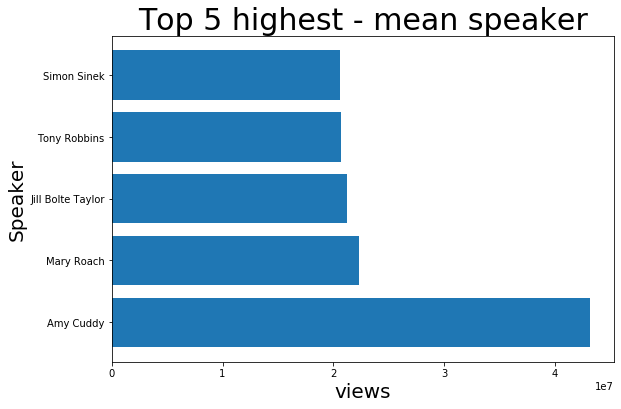

In [40]:
plt.figure(figsize=(9,6))
plt.barh(y = 'Main speaker',width='Views',data = top_main_speaker)
plt.title('Top 5 highest - mean speaker',fontsize=30)
plt.xlabel('views',fontsize=20)
plt.ylabel('Speaker',fontsize=20)

*See ! He is not even available in this list. That is why main speaker can not be the success key of a talk !*

*Let's fly to duraion !*

Text(0.5, 0, 'duration (in min)')

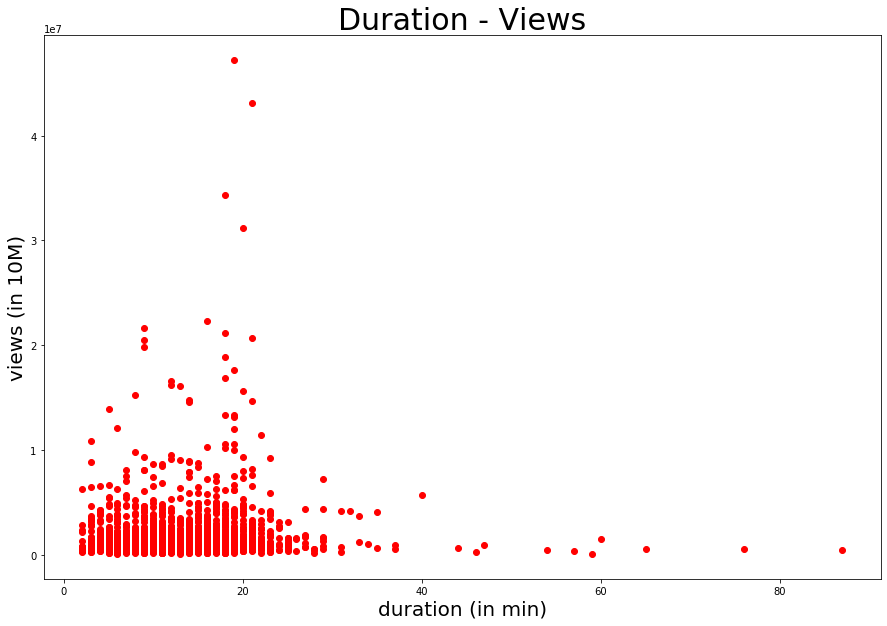

In [41]:
plt.figure(figsize=(15,10))
plt.scatter(x=data['duration']//60,y='views',data=data,c='r',marker='o')
plt.title('Duration - Views',fontsize=30)
plt.ylabel('views (in 10M)',fontsize=20)
plt.xlabel('duration (in min)',fontsize=20)


*Easy to see that the longer talk is, the less view is !*

*It's gonna be awesome for a talk whose duration drops between 15 and 25 minutes*

*So guess the next criterion ! Maybe language ? Who knows ? Let's check it out !*

Text(0.5, 0, 'languages')

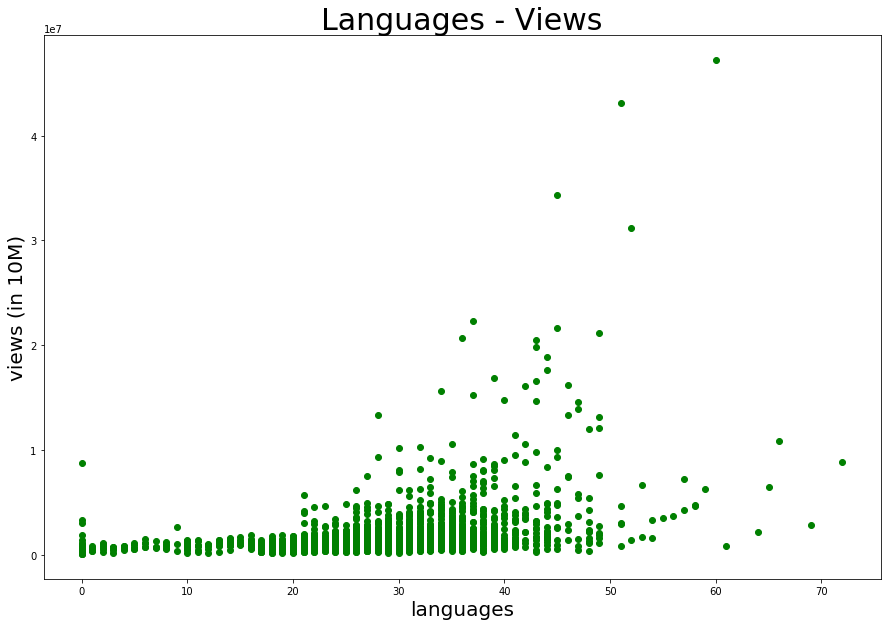

In [42]:
plt.figure(figsize=(15,10))
plt.scatter(x='languages',y='views',data=data,c='g',marker='o')
plt.title('Languages - Views',fontsize=30)
plt.ylabel('views (in 10M)',fontsize=20)
plt.xlabel('languages',fontsize=20)

*In Ted Talks , there are so many languages having been used(Maximum is 72 and minimum is 0). Sounds weird! Actually not! You can see on Youtube, talks with zero language are dancing videos! Interesting !*

*Also we can see easily that the more languages are,the more popular talk is. Hence language is the next milestone of talk success !*

*Now take a look at topics !*

*However we need to merge data and tags_df and save it into **tag_merge** dataframe first*

In [43]:
tag_merge = tags_df.merge(data,on='talk_id')[['talk_id','tags_x','comments','views']]
tag_merge_view = tag_merge.groupby('tags_x')['views'].mean().sort_values(ascending=False).head(5).sort_values(ascending=True)
tag_merge_comment = tag_merge.groupby('tags_x')['comments'].mean().sort_values(ascending=False).head(5).sort_values(ascending=True)

Text(0, 0.5, 'Tag')

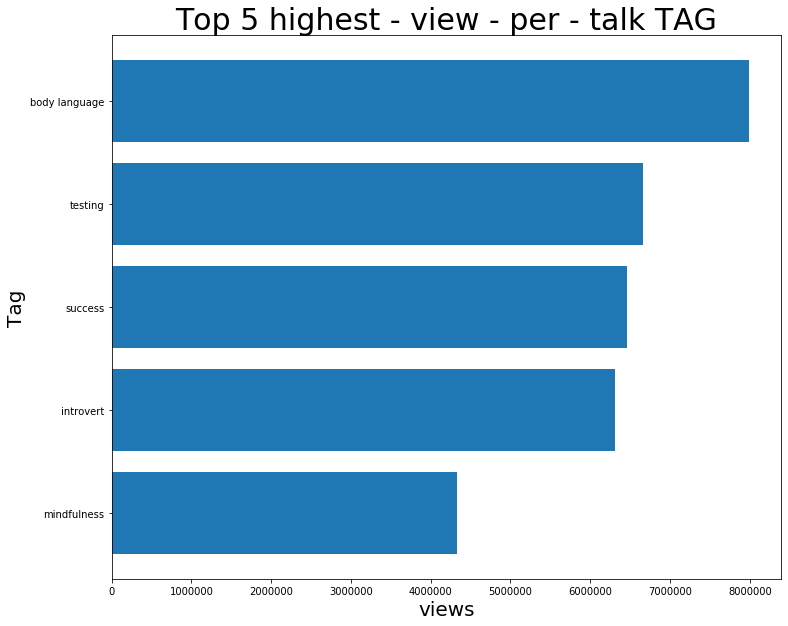

In [44]:
plt.figure(figsize=(12,10))
plt.barh(y = tag_merge_view.index,width=tag_merge_view.values,data = tag_merge_view)
plt.title('Top 5 highest - view - per - talk TAG',fontsize=30)
plt.xlabel('views',fontsize=20)
plt.ylabel('Tag',fontsize=20)

Text(0, 0.5, 'Tag')

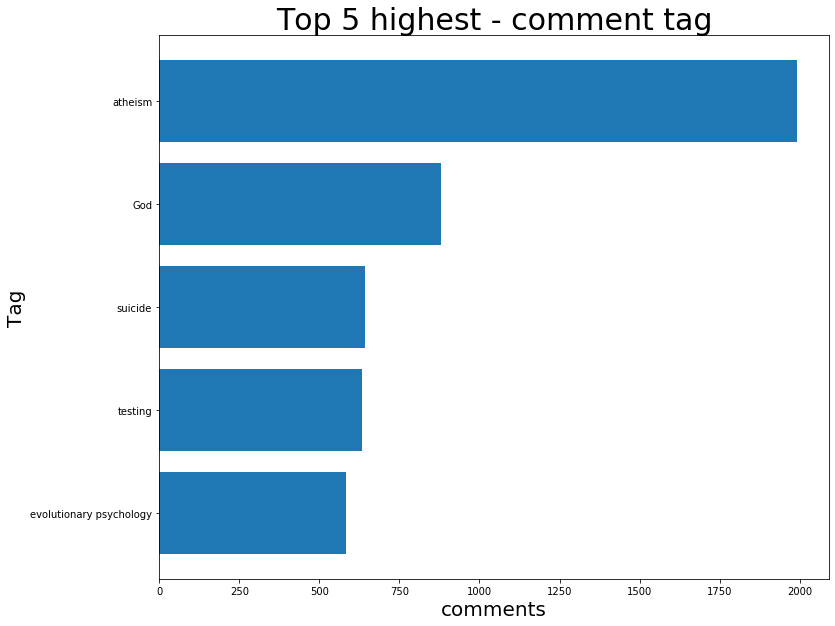

In [45]:
plt.figure(figsize=(12,10))
plt.barh(y = tag_merge_comment.index,width=tag_merge_comment.values,data = tag_merge_comment)
plt.title('Top 5 highest - comment tag',fontsize=30)
plt.xlabel('comments',fontsize=20)
plt.ylabel('Tag',fontsize=20)

*Clearly topic is the most promising issue for success talk !*

*Now let's find out the talk distribution over time*

*However we need to convert film_date and published_date into real time*

In [46]:
# data['film_date'].astype('datetime64[s]')

In [47]:
import datetime
data['film_date']=pd.to_datetime(data['film_date'].astype('datetime64[s]'),unit='s')
data['published_date']=pd.to_datetime(data['published_date'].astype('datetime64[s]'),unit='s')

Text(0.5, 0, 'Year')

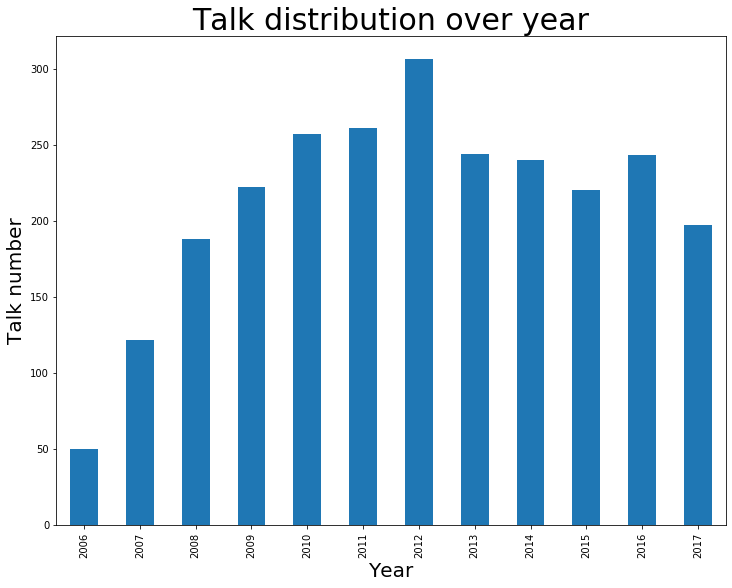

In [48]:
plt.figure(figsize=(12,9))
data.groupby(data.published_date.dt.year).title.count().plot.bar()
plt.title('Talk distribution over year',fontsize=30)
plt.ylabel('Talk number',fontsize=20)
plt.xlabel('Year',fontsize=20)

*What about talk distribution over month ?*

Text(0.5, 0, 'Month-Year')

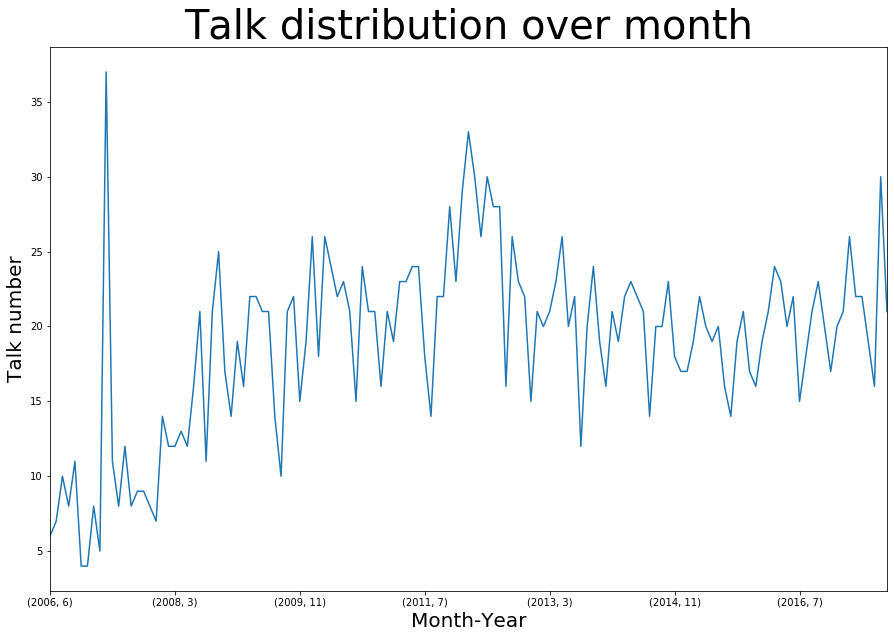

In [49]:
plt.figure(figsize=(15,10))
data['year']=data.published_date.dt.year
data['month']=data.published_date.dt.month
data.groupby(['year','month']).title.count().plot.line()
plt.title('Talk distribution over month',fontsize=40)
plt.ylabel('Talk number',fontsize=20)
plt.xlabel('Month-Year',fontsize=20)

*Let's find out what is the most time to release talks*

In [50]:
Ted_month=data.groupby(['year','month']).title.count().reset_index(name='talks')
Ted_month=Ted_month.pivot('year','month','talks')
Ted_month.fillna(0,inplace=True)

Text(0.5, 1, 'Number of talks over time')

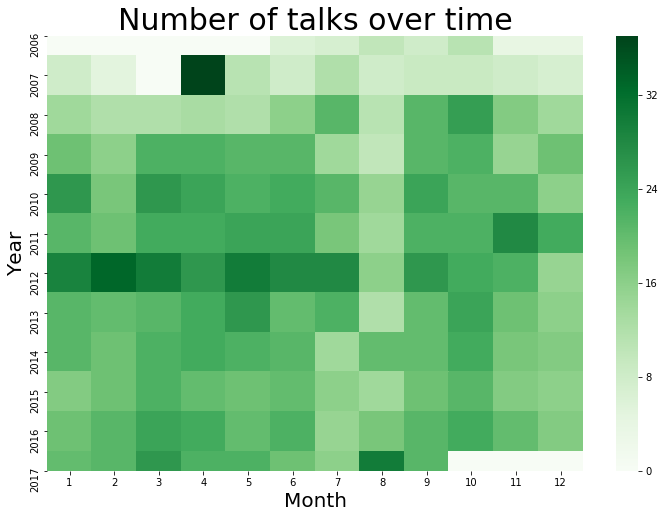

In [51]:
plt.figure(figsize=(12,8))
sns.heatmap(Ted_month,cmap="Greens")
plt.xlabel('Month',fontsize=20)
plt.ylabel('Year',fontsize=20)
plt.title('Number of talks over time',fontsize=30)

*In conclusion Ted Talk should focus on*
- *Main speaker : it does not matter*
- *Duration : about 15 - 25 min*
- *Language : the more the better*
- *Release time : first half of a year*
- *Topic : body language , testing , success*